### Importing packages

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#### setting random seed
to ensures that experiments are reproducible (get consistent results accross runs). It ensure that the same sequence of random numbers is generated each time we run our code.
This consistency is essential for comparing different models, hyperparameters, or algorithms.

In [ ]:
np.random.seed(87)

#### Reading train dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/csv files/counterfeit_train.csv')
df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


#### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [ ]:
df.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
count,5652.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,14.115057,1995.836316,151.401518,0.079174,2280.583480
std,4.649668,8.368979,62.203961,0.051481,1693.354404
min,5.855000,1983.000000,41.790000,0.013000,146.290000
25%,9.995000,1985.000000,104.509400,0.040058,933.265600
50%,13.800000,1997.000000,153.195700,0.066955,1902.670400
75%,18.050000,2002.000000,196.148350,0.107697,3207.638400
max,22.650000,2007.000000,277.188400,0.341391,13199.964800


In [ ]:
df.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

<Axes: xlabel='Counterfeit_Weight'>

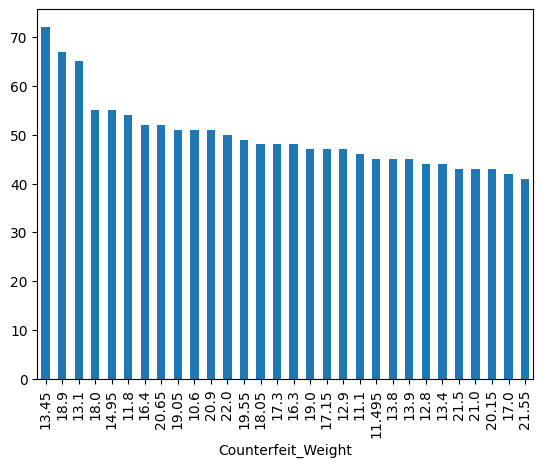

In [ ]:
df.Counterfeit_Weight.value_counts().head(30).plot(kind='bar')

In [ ]:
df.SidEffect_Level.value_counts(dropna=False) # ordinal_encoding

SidEffect_Level
mild        4434
critical    2384
Name: count, dtype: int64

In [ ]:
df.Medicine_Type.unique() # dummy

array(['Antimalarial', 'Mstablizers', 'Cardiac', 'OralContraceptives',
       'Hreplacements', 'Antiseptics', 'Statins', 'Analgesics',
       'MuscleRelaxants', 'Antibiotics', 'Antifungal', 'Antiviral',
       'Tranquilizers', 'Antacids', 'Antipyretics', 'Stimulants'],
      dtype=object)

In [ ]:
df.Medicine_Type.value_counts()

Medicine_Type
Hreplacements         976
Antibiotics           970
Antiseptics           724
OralContraceptives    694
Antipyretics          536
Cardiac               522
Mstablizers           514
Tranquilizers         420
Analgesics            356
Antimalarial          339
Antacids              206
Statins               167
MuscleRelaxants       139
Antifungal            111
Stimulants             95
Antiviral              49
Name: count, dtype: int64

In [ ]:
df.Active_Since.unique() , df.Active_Since.dtype

(array([1995, 1983, 2000, 2007, 1985, 2005, 1996, 2002, 1997]), dtype('int64'))

In [ ]:
df.DistArea_ID.unique() # encoding

array(['Area046', 'Area027', 'Area019', 'Area045', 'Area018', 'Area013',
       'Area017', 'Area010', 'Area035', 'Area049'], dtype=object)

In [ ]:
df.DistArea_ID.value_counts()

DistArea_ID
Area017    760
Area046    749
Area013    749
Area035    748
Area049    739
Area045    736
Area027    735
Area018    729
Area010    442
Area019    431
Name: count, dtype: int64

In [ ]:
df.Area_City_Type.unique() # ordinal

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
df.Area_City_Type.value_counts()

Area_City_Type
Tier 3    2655
Tier 2    2244
Tier 1    1919
Name: count, dtype: int64

In [ ]:
df.Area_Type.value_counts()

Area_Type
DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: count, dtype: int64

In [ ]:
df.Area_Type.unique() # encoding

array(['DownTown', 'CityLimits', 'MidTownResidential', 'Industrial'],
      dtype=object)

In [ ]:
df.Area_dist_level.unique() # dummy

array(['Small', 'Medium', 'Unknown', 'High'], dtype=object)

In [ ]:
df.Area_dist_level.value_counts()

Area_dist_level
Medium     2203
Unknown    1938
Small      1928
High        749
Name: count, dtype: int64

In [ ]:
df.Availability_rating.nunique()

6317

#### Reading test dataset

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/csv files/counterfeit_test.csv')
test_df.isnull().sum()

Medicine_ID              0
Counterfeit_Weight     297
DistArea_ID              0
Active_Since             0
Medicine_MRP             0
Medicine_Type            0
SidEffect_Level          0
Availability_rating      0
Area_Type                0
Area_City_Type           0
Area_dist_level          0
dtype: int64

In [ ]:
new_test_df = test_df.drop('Medicine_ID', axis=1)
new_test_df.columns

Index(['Counterfeit_Weight', 'DistArea_ID', 'Active_Since', 'Medicine_MRP',
       'Medicine_Type', 'SidEffect_Level', 'Availability_rating', 'Area_Type',
       'Area_City_Type', 'Area_dist_level'],
      dtype='object')

In [ ]:
df.corr(numeric_only=True)

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
Counterfeit_Weight,1.000000,-0.016590,0.028523,-0.017632,0.005959
Active_Since,-0.016590,1.000000,0.002996,-0.075744,-0.039595
Medicine_MRP,0.028523,0.002996,1.000000,-0.003216,0.573684
Availability_rating,-0.017632,-0.075744,-0.003216,1.000000,-0.124058
Counterfeit_Sales,0.005959,-0.039595,0.573684,-0.124058,1.000000


### Visualizing

<Axes: >

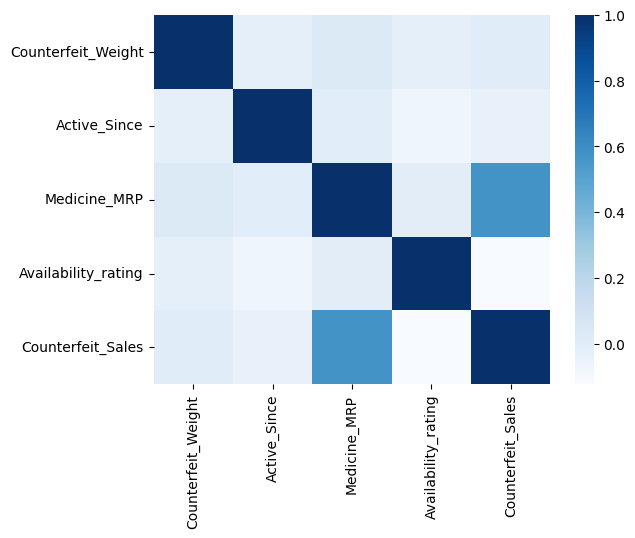

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), cmap='Blues')

In [ ]:
import matplotlib.pyplot as plt

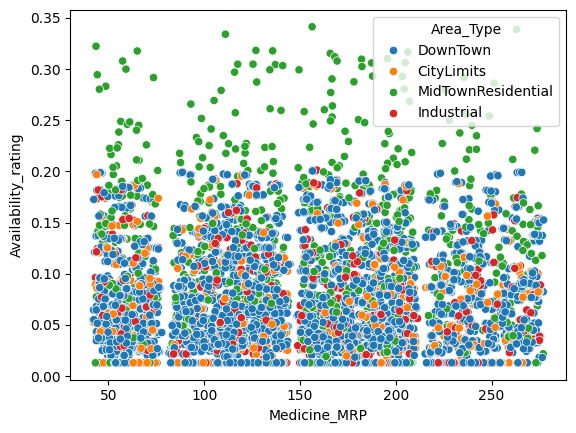

In [ ]:
sns.scatterplot(x='Medicine_MRP', y='Availability_rating',
                hue='Area_Type',data=df);

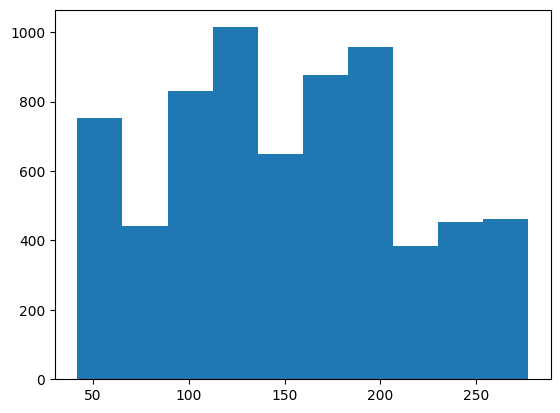

In [ ]:
plt.hist(df.Medicine_MRP, bins=10);

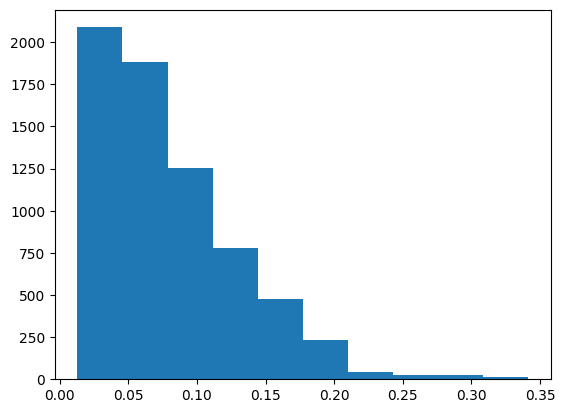

In [ ]:
plt.hist(df.Availability_rating, bins=10);

In [ ]:
pd.crosstab(df.Area_City_Type, df.Area_Type)

Area_Type,CityLimits,DownTown,Industrial,MidTownResidential
Area_City_Type,,,,
Tier 1,0,1488,0,431
Tier 2,0,2244,0,0
Tier 3,735,749,729,442


In [ ]:
pd.crosstab(df.DistArea_ID, df.Area_dist_level)

Area_dist_level,High,Medium,Small,Unknown
DistArea_ID,,,,
Area010,0,0,0,442
Area013,749,0,0,0
Area017,0,0,0,760
Area018,0,729,0,0
Area019,0,0,431,0
Area027,0,735,0,0
Area035,0,0,748,0
Area045,0,0,0,736
Area046,0,0,749,0


In [ ]:
df.loc[df['Medicine_ID']=='YVV26', 'Counterfeit_Weight']

1        NaN
671     7.45
1908    7.45
3513     NaN
5490    7.45
5568    7.45
6576    7.45
Name: Counterfeit_Weight, dtype: float64

In [ ]:
df.loc[df['Medicine_ID']=='RRA15', 'Counterfeit_Weight']

0       13.1
994     13.1
2613    13.1
3717    13.1
5143     NaN
5359    13.1
Name: Counterfeit_Weight, dtype: float64

In [ ]:
df.groupby('Medicine_ID')['Counterfeit_Weight'].mean()

Medicine_ID
AAJ32     9.400
AAS12    15.800
ACC80    18.050
ACW12    20.650
ADE15     6.510
          ...  
ZXN29    10.900
ZXO53    13.800
ZYE13    11.995
ZYP12     9.485
ZZU58    17.400
Name: Counterfeit_Weight, Length: 1557, dtype: float64

grouped_means =test_df.groupby('Medicine_ID')['Counterfeit_Weight'].mean()
test_df['imputed_weight'] =test_df['Medicine_ID'].map(grouped_means)
test_df['Counterfeit_Weight'].fillna(test_df['imputed_weight'], inplace=True)
test_df.Counterfeit_Weight.isna().sum()<br>
if we try imputing using the above code, levering the fact that counterfeit_weight values are related to corresponding Medicine_id value we are left with 114 null values in testing dataset whereas 11 null values in training dataset so its not improving our accuracy so instead will use **KNN imputer a Multivariate Imputation technique**. it imputes the missing values by considering the value of its K-Nearest neighbors. this method leverages the similarities between datapoints to impute NA values effectively.

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin # these modules help us in the building pipelines


In [ ]:
class VarSelector(BaseEstimator, TransformerMixin):  # inherit the modules, same sequence standard practice /norm
    def __init__(self, feature_names):
       self.feature_names = feature_names   # global - written using self, so it is available inside that class

    # fit n trnsform are part of sklearn we r overwriting it with our own code
    def fit(self,x,y=None):  # fit method implements a logic on data, learns from the data
        return self

    def transform(self,X): # whatever it has learnt from the fit it 'apply' on that data
        return X[self.feature_names]  # getting the feature names as it is

    def get_feature_names(self):  # give the feature/ column names to be written
        return self.feature_names
    def get_feature_names_out(self, feature_names_out): # taking the input of what feature names need to be given out
        return self.feature_names

In [ ]:
class get_dummies_Pipe(BaseEstimator, TransformerMixin):
    def __init__(self, freq_cutoff=0):
        self.freq_cutoff =freq_cutoff
        self.var_cat_dict ={}
        self.feature_names =[]

    def fit(self, x,y=None):  # in fit trying to identifying all the categories that r present in that var
        data_cols = x.columns
        for col in data_cols:
            k =x[col].value_counts()
            if(k< self.freq_cutoff).sum() ==0:
                cats =k.index[:-1]
            else:
                cats =k.index[k >self.freq_cutoff]
            self.var_cat_dict[col] =cats

        for col in self.var_cat_dict.keys():
            for cat in self.var_cat_dict[col]:
                ## added a fix here due to duplicate columns generated
                if col+'_'+cat not in self.feature_names:
                    self.feature_names.append(col+ '_' +cat)
        return self

    def transform(self,x,y=None):
        dummy_data =x.copy()

        for col in self.var_cat_dict.keys():
            for cat in self.var_cat_dict[col]:
                name =col+ '_'+cat
                dummy_data[name] = (dummy_data[col]==cat).astype(int)

            del dummy_data[col]
        return dummy_data

    def get_feature_names(self):
        return self.feature_names

    def get_feature_names_out(self, feature_names_out):
        return self.feature_names



class pdPipeline(Pipeline):
    def get_feature_names(self):
        last_step = self.steps[-1][-1]
        return last_step.get_feature_names()

In [ ]:
X = df.drop(['Counterfeit_Sales','Medicine_ID'], axis=1)
y =df.Counterfeit_Sales

#### Splitting data into train test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,
                                                random_state=87)

In [ ]:
X_train.index ==y_train.index

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
from sklearn.preprocessing import RobustScaler

#### creating and fitting the pipeline

increasing dummy threshold is deteriorating performance

In [ ]:
p1 =pdPipeline([
    ('select', VarSelector(['Counterfeit_Weight'])),
    #('impute', SimpleImputer(add_indicator=True)),
   ('impute', KNNImputer(n_neighbors=5, weights='distance')),
    ('scalar', RobustScaler())

])

p2 =pdPipeline([
    ('select', VarSelector(['DistArea_ID','Medicine_Type','Area_Type','Area_dist_level'])),
    ('dummies', get_dummies_Pipe(100)),  # try 100 and thn 700
    ('scalar', RobustScaler())
    ])

p3 =pdPipeline([
    ('select', VarSelector(['SidEffect_Level','Area_City_Type'])),
    ('ordinal', OrdinalEncoder(categories=[['mild','critical'], ['Tier 1','Tier 2','Tier 3']])),
    ('scalar', RobustScaler())
    ])

p4 =pdPipeline([
    ('select', VarSelector(['Active_Since','Medicine_MRP','Availability_rating'])),
    ('scalar', RobustScaler())
    ])



In [ ]:
data_pipe = FeatureUnion([
    ('p1',p1),
    ('p2',p2),
    ('p3',p3),
    ('p4',p4),
])
# FeatureUnion combines all pipeline n run them in one short n give final output

In [ ]:
dp_fit = data_pipe.fit(X_train)
dp_fit

FeatureUnion(transformer_list=[('p1',
                                pdPipeline(steps=[('select',
                                                   VarSelector(feature_names=['Counterfeit_Weight'])),
                                                  ('impute',
                                                   KNNImputer(weights='distance')),
                                                  ('scalar', RobustScaler())])),
                               ('p2',
                                pdPipeline(steps=[('select',
                                                   VarSelector(feature_names=['DistArea_ID',
                                                                              'Medicine_Type',
                                                                              'Area_Type',
                                                                              'Area_dist_level'])),
                                                  ('dummies',
                                                   get_dummies_Pipe(freq_cutoff...
                                pdPipeline(steps=[('select',
                                                   VarSelector(feature_names=['SidEffect_Level',
                                                                              'Area_City_Type'])),
                                                  ('ordinal',
                                                   OrdinalEncoder(categories=[['mild',
                                                                               'critical'],
                                                                              ['Tier '
                                                                               '1',
                                                                               'Tier '
                                                                               '2',
                                                                               'Tier '
                                                                               '3']])),
                                                  ('scalar', RobustScaler())])),
                               ('p4',
                                pdPipeline(steps=[('select',
                                                   VarSelector(feature_names=['Active_Since',
                                                                              'Medicine_MRP',
                                                                              'Availability_rating'])),
                                                  ('scalar',
                                                   RobustScaler())]))])

#### Transforming the training (train and test set)  and final testing dataset

In [ ]:
X_train_train =pd.DataFrame(data=dp_fit.transform(X_train), columns=dp_fit.get_feature_names_out())
X_train_train.head()

,p1__Counterfeit_Weight,p2__DistArea_ID_Area027,p2__DistArea_ID_Area046,p2__DistArea_ID_Area045,p2__DistArea_ID_Area049,p2__DistArea_ID_Area017,p2__DistArea_ID_Area035,p2__DistArea_ID_Area013,p2__DistArea_ID_Area018,p2__DistArea_ID_Area010,...,p2__Area_Type_MidTownResidential,p2__Area_Type_CityLimits,p2__Area_dist_level_Medium,p2__Area_dist_level_Small,p2__Area_dist_level_Unknown,p3__SidEffect_Level,p3__Area_City_Type,p4__Active_Since,p4__Medicine_MRP,p4__Availability_rating
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.5,-0.823529,-0.529922,-0.618214
1,-0.791429,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,-0.705882,0.365088,-0.259638
2,0.954839,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.470588,0.114594,-0.786344
3,0.126481,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.176471,0.979612,-0.554395
4,0.044392,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.5,-0.117647,0.358516,-0.239613


In [ ]:
X_train_train.isnull().sum().sum()

0

In [ ]:
X_test_test =pd.DataFrame(data=dp_fit.transform(X_test),
                          columns= dp_fit.get_feature_names_out())
X_test_test.head()

,p1__Counterfeit_Weight,p2__DistArea_ID_Area027,p2__DistArea_ID_Area046,p2__DistArea_ID_Area045,p2__DistArea_ID_Area049,p2__DistArea_ID_Area017,p2__DistArea_ID_Area035,p2__DistArea_ID_Area013,p2__DistArea_ID_Area018,p2__DistArea_ID_Area010,...,p2__Area_Type_MidTownResidential,p2__Area_Type_CityLimits,p2__Area_dist_level_Medium,p2__Area_dist_level_Small,p2__Area_dist_level_Unknown,p3__SidEffect_Level,p3__Area_City_Type,p4__Active_Since,p4__Medicine_MRP,p4__Availability_rating
0,-0.022772,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,-0.5,-0.117647,1.064172,1.483778
1,0.051854,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.294118,-0.004762,0.034428
2,-0.477996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.294118,0.268428,0.614322
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-0.5,-0.823529,0.957988,0.115625
4,0.730959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-0.5,0.000000,0.209083,-0.167437


In [ ]:
X_test_test.isnull().sum().sum()

0

In [ ]:
X_test_final = pd.DataFrame(data=dp_fit.transform(new_test_df),
                            columns= dp_fit.get_feature_names_out())
X_test_final.head()

,p1__Counterfeit_Weight,p2__DistArea_ID_Area027,p2__DistArea_ID_Area046,p2__DistArea_ID_Area045,p2__DistArea_ID_Area049,p2__DistArea_ID_Area017,p2__DistArea_ID_Area035,p2__DistArea_ID_Area013,p2__DistArea_ID_Area018,p2__DistArea_ID_Area010,...,p2__Area_Type_MidTownResidential,p2__Area_Type_CityLimits,p2__Area_dist_level_Medium,p2__Area_dist_level_Small,p2__Area_dist_level_Unknown,p3__SidEffect_Level,p3__Area_City_Type,p4__Active_Since,p4__Medicine_MRP,p4__Availability_rating
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.5,-0.823529,-0.744519,0.664779
1,-0.097399,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.176471,1.143289,1.125926
2,-1.045161,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.176471,-0.606086,1.122660
3,0.626481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.5,-0.058824,-0.196259,0.484969
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-0.5,-0.823529,-0.444552,-0.646899


## Trying different algorithms using RandomizedSearcCV to get best parameters that reduces the Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params ={
    'criterion' : ['squared_error'],   #'friedman_mse','absolute_error'
    'n_estimators' :[100,200,500,700,1000],
    'max_depth' : [2,5,7,10,15],
    'min_samples_split' :[2,4,5,7,10,50],
    'min_samples_leaf' : [1,3,5,7,10,50],
    'max_features' :['sqrt','log2',1,5,10,15,20,70],
    'bootstrap' :[True, False],
    'warm_start': [True, False]
}
rf = RandomForestRegressor(random_state=87)

random_search =RandomizedSearchCV(rf, cv=5, param_distributions=params,
                          scoring='neg_mean_absolute_error',n_iter=10,
                          verbose=False, n_jobs=-1)

In [ ]:
random_search.fit(X_train_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=87),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error'],
                                        'max_depth': [2, 5, 7, 10, 15],
                                        'max_features': ['sqrt', 'log2', 1, 5,
                                                         10, 15, 20, 70],
                                        'min_samples_leaf': [1, 3, 5, 7, 10,
                                                             50],
                                        'min_samples_split': [2, 4, 5, 7, 10,
                                                              50],
                                        'n_estimators': [100, 200, 500, 700,
                                                         1000],
                                        'warm_start': [True, False]},
                   scoring='neg_mean_absolute_error', verbose=False)

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top+1):
        candidates = np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print('Mean validation score:{0:.6f} (std: {1:.6f})'.format(
            results['mean_test_score'][candidate],
            results['std_test_score'][candidate]))

            print('Parameters :{0}'.format(results['params'][candidate]))
            print("")

In [ ]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score:-760.479829 (std: 18.464827)
Parameters :{'warm_start': True, 'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 70, 'max_depth': 7, 'criterion': 'squared_error', 'bootstrap': True}

Model with rank: 2
Mean validation score:-767.394578 (std: 18.856866)
Parameters :{'warm_start': False, 'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 70, 'max_depth': 10, 'criterion': 'squared_error', 'bootstrap': True}

Model with rank: 3
Mean validation score:-769.742925 (std: 19.881285)
Parameters :{'warm_start': True, 'n_estimators': 700, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 15, 'max_depth': 10, 'criterion': 'squared_error', 'bootstrap': False}



In [ ]:
rf= RandomForestRegressor(**{'warm_start': True, 'n_estimators': 700,
                             'min_samples_split': 2, 'min_samples_leaf': 10,
                             'max_features': 70, 'max_depth': 7,
                             'criterion': 'squared_error', 'bootstrap': True})

rf.fit(X_train_train,y_train)
pred =rf.predict(X_test_test)
mae= np.round(mean_absolute_error(y_test,pred),4)
mae

715.7175

In [ ]:
1-(715.7175/1660)  # Score = 1-(MAE/1660)

0.5688448795180723

In [ ]:
from xgboost.sklearn import XGBRFRegressor

In [ ]:
params ={'n_estimators' : [100,500],
             "learning_rate":[0.01,0.001,0.05,0.1,0.5,0.9,1],
        # 'max_depth' :[2,5,6,8,9,10],
        # 'colsample_bytree' :[0.5,0.8],
         #'subsample' :[0.5,0.8,0.9],
         #'gamma' :[0,2,5,9,10],
         #'min_child_weight':[0.5,1,2,5,10]
}

In [ ]:
xgbrf =XGBRFRegressor(objective='reg:squarederror')

In [ ]:
random_search =RandomizedSearchCV(xgbrf, cv=5, param_distributions=params,
                          scoring='neg_mean_absolute_error',n_iter=10,
                          verbose=False, n_jobs=-1)

In [ ]:
random_search.fit(X_train_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            max_bin=None,
                                            max_cat_threshold=Non...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='reg:squarederror',
                                            random_state=None, reg_alpha=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.05,
                                                          0.1, 0.5, 0.9, 1],
                                        'n_estimators': [100, 500]},
                   scoring='neg_mean_absolute_error', verbose=False)

In [ ]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score:-761.316709 (std: 20.073914)
Parameters :{'n_estimators': 500, 'learning_rate': 1}

Model with rank: 2
Mean validation score:-761.663903 (std: 20.254093)
Parameters :{'n_estimators': 100, 'learning_rate': 1}

Model with rank: 3
Mean validation score:-777.693005 (std: 17.600520)
Parameters :{'n_estimators': 100, 'learning_rate': 0.9}



In [ ]:
xgbrf = XGBRFRegressor(**{'n_estimators': 500, 'learning_rate': 1,
                          'objective' :'reg:squarederror'})
xgbrf.fit(X_train_train,y_train)
pred = xgbrf.predict(X_test_test)
mae= np.round(mean_absolute_error(y_test,pred),4)
mae

715.0205

In [ ]:
parameters ={
    'learning_rate': ["adaptive"], #"constant","invscaling",
    'hidden_layer_sizes':[(5,10,5),(10,20,5),(20,10,5),(20,10),(30,20)],
    'activation' :["relu"],  #, "tanh"
    'alpha' :[0.0001, 0.0005,0.001,0.01,0.1,0.05],
    'learning_rate_init': [0.001,0.01,0.5,0.005],
    'warm_start' : [True, False],
    'shuffle': [True, False],
    'beta_1' :[0.5,0.8,0.1,0.2,0.3],
    'beta_2' :[0.5,0.8,0.1,0.2,0.3]
}

In [ ]:
neu1 = MLPRegressor()
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(neu1, n_iter=30, cv=10,
                                  param_distributions=parameters,
                                  scoring='neg_root_mean_squared_error', random_state=87,
                                  n_jobs=-1, verbose=20)

In [ ]:
random_search.fit(X_train_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=10, estimator=MLPRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'activation': ['relu'],
                                        'alpha': [0.0001, 0.0005, 0.001, 0.01,
                                                  0.1, 0.05],
                                        'beta_1': [0.5, 0.8, 0.1, 0.2, 0.3],
                                        'beta_2': [0.5, 0.8, 0.1, 0.2, 0.3],
                                        'hidden_layer_sizes': [(5, 10, 5),
                                                               (10, 20, 5),
                                                               (20, 10, 5),
                                                               (20, 10),
                                                               (30, 20)],
                                        'learning_rate': ['adaptive'],
                                        'learning_rate_init': [0.001, 0.01, 0.5,
                                                               0.005],
                                        'shuffle': [True, False],
                                        'warm_start': [True, False]},
                   random_state=87, scoring='neg_root_mean_squared_error',
                   verbose=20)

In [ ]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score:-1075.651504 (std: 50.748703)
Parameters :{'warm_start': True, 'shuffle': True, 'learning_rate_init': 0.005, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (20, 10), 'beta_2': 0.8, 'beta_1': 0.8, 'alpha': 0.0005, 'activation': 'relu'}

Model with rank: 2
Mean validation score:-1076.231574 (std: 48.879348)
Parameters :{'warm_start': False, 'shuffle': True, 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (20, 10), 'beta_2': 0.3, 'beta_1': 0.3, 'alpha': 0.001, 'activation': 'relu'}

Model with rank: 3
Mean validation score:-1076.503685 (std: 48.049617)
Parameters :{'warm_start': False, 'shuffle': True, 'learning_rate_init': 0.005, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (20, 10, 5), 'beta_2': 0.8, 'beta_1': 0.8, 'alpha': 0.1, 'activation': 'relu'}



In [ ]:
y_pred = random_search.predict(X_test_test)

mae= np.round(mean_absolute_error(y_test,y_pred),4)
mae

713.7989

#### Using the best parameters got by hyperparameter tuning and trying them with VotingRegressor to increase the model performance and reduce the MAE. using VotingRegressor the score has been improved by 0.1.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost.sklearn import XGBRegressor

In [ ]:
from  sklearn.ensemble import VotingRegressor

In [ ]:
reg1 =MLPRegressor(**{'warm_start': False, 'shuffle': True,
                      'learning_rate_init': 0.01,
                      'learning_rate': 'adaptive', 'hidden_layer_sizes': (20, 10),
                      'beta_2': 0.2, 'beta_1': 0.2, 'alpha': 0.01, 'activation': 'relu'})


reg2 = MLPRegressor(**{'warm_start': True, 'shuffle': True,
                       'learning_rate_init': 0.005, 'learning_rate': 'adaptive',
                       'hidden_layer_sizes': (20, 10), 'beta_2': 0.8, 'beta_1': 0.8,
                       'alpha': 0.0005, 'activation': 'relu'})

reg3 = MLPRegressor(**{'warm_start': False, 'shuffle': False,
                    'learning_rate_init': 0.005, 'learning_rate': 'adaptive',
                    'hidden_layer_sizes': (20, 10), 'beta_2': 0.8, 'beta_1': 0.5,
                    'alpha': 0.0001, 'activation': 'relu'})
reg4 =RandomForestRegressor(**{'warm_start': False, 'n_estimators': 500,
                             'min_samples_split': 2, 'min_samples_leaf': 10,
                             'max_features': 70, 'max_depth': 7,
                             'criterion': 'squared_error', 'bootstrap': True})


reg5 =ExtraTreesRegressor(**{'n_estimators': 700, 'min_samples_split': 5,
                             'min_samples_leaf': 20, 'max_features': 35,
                             'max_depth': 15, 'bootstrap': True})

reg6 =XGBRegressor(n_estimators=500,learning_rate = 0.01, objective='reg:squarederror',
                     max_depth= 4, min_child_weight= 5,gamma=10,
                       subsample = 0.9, colsample_bytree = 0.9, colsample_bylevel= 0.9 )

In [ ]:
estimators =[('neural', reg1),('neural1',reg2),('neural2', reg3),('rf',reg4),
              ('et',reg5),('xg', reg6)]

In [ ]:
from sklearn.model_selection import cross_val_score
vr = VotingRegressor(estimators)
scores = cross_val_score(vr, X_train_train,y_train,scoring='r2', cv=10)
print('Voting regressor', np.round(np.mean(scores),2))

Voting regressor 0.6


In [ ]:
vr.fit(X_train_train,y_train)

VotingRegressor(estimators=[('neural',
                             MLPRegressor(alpha=0.01, beta_1=0.2, beta_2=0.2,
                                          hidden_layer_sizes=(20, 10),
                                          learning_rate='adaptive',
                                          learning_rate_init=0.01)),
                            ('neural1',
                             MLPRegressor(alpha=0.0005, beta_1=0.8, beta_2=0.8,
                                          hidden_layer_sizes=(20, 10),
                                          learning_rate='adaptive',
                                          learning_rate_init=0.005,
                                          warm_start=True)),
                            ('neural2',
                             MLPRegressor(beta_1=0.5...
                                          gamma=10, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.01, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=4,
                                          max_leaves=None, min_child_weight=5,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=500,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...))])

In [ ]:
y_pred = vr.predict(X_test_test)
mae= np.round(mean_absolute_error(y_test,y_pred),4)
mae

710.3044

In [ ]:
1-(710.53/1660)

0.5719698795180723

In [ ]:
pd.DataFrame({'actual': y_test, 'predicted' :y_pred})

,actual,predicted
4852,3958.6608,3961.920222
704,2535.1804,2396.294983
2167,1951.2738,2921.040852
2981,802.1030,666.991178
6745,2233.5730,2759.812667
...,...,...
4745,4214.3280,1672.207715
2334,984.5322,966.638045
2783,1519.1696,1358.200370
2473,1441.2710,2958.036046


#### Predicting the actual test dataset to submit the final output.

In [ ]:
submit = vr.predict(X_test_final)
submit

array([2393.609636  , 3941.71378099, 1460.57523612, ..., 2977.42554363,
       3918.49484023, 3815.56650387])

In [ ]:
submission =pd.DataFrame({"Medicine_ID": test_df.Medicine_ID, 'Counterfit_Sales': submit})
submission.head()

,Medicine_ID,Counterfit_Sales
0,HLZ81,2393.609636
1,ECE94,3941.713781
2,SAD14,1460.575236
3,EQV63,412.275404
4,AIR10,365.093601


In [ ]:
submission.to_csv('pharamcy_attempt1.csv', index=False)